In [35]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

train_val = pd.read_csv('titanic/train.csv')
test_val = pd.read_csv('titanic/test.csv')

train_val = pd.get_dummies(train_val, columns=['Sex'], dtype=int)
test_val = pd.get_dummies(test_val, columns=['Sex'], dtype=int)

train_val = pd.get_dummies(train_val, columns=['Pclass'], dtype=int)
test_val = pd.get_dummies(test_val, columns=['Pclass'], dtype=int)

train_val['Age'] = train_val['Age'].fillna(train_val['Age'].median(skipna=True)) # füllt fehlende Werte mit dem Median von Age
test_val['Age'] = test_val['Age'].fillna(test_val['Age'].median(skipna=True)) # füllt fehlende Werte mit dem Median von Age

print(train_val.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked  Sex_female  \
0  22.0      1      0         A/5 21171   7.2500   NaN        S           0   
1  38.0      1      0          PC 17599  71.2833   C85        C           1   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S           1   
3  35.0      1      0            113803  53.1000  C123        S           1   
4  35.0      0      0            373450   8.0500   NaN        S           0   

   Sex_male  Pclass_1  Pclass_2  Pclass_3  
0     

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


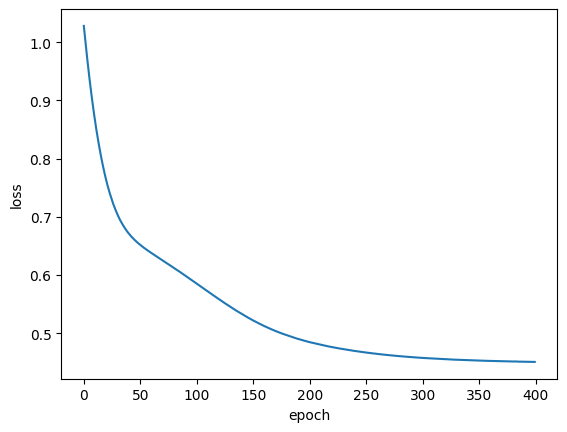

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(5, activation='sigmoid', input_dim=5)) #We have 5 input features
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

features = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']
history = model.fit(train_val[features], train_val['Survived'], epochs=400, batch_size=128, verbose=0)
train_loss = history.history['loss']
xc         = range(len(train_loss))
plt.figure()
plt.plot(xc, train_loss)
plt.xlabel("epoch")
plt.ylabel("loss")

pred = model.predict(test_val[features])
pred = pred.round().astype(int)

output = pd.DataFrame({'PassengerId': test_val.PassengerId, 'Survived': pred.flatten()})
print(output)